In [2]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')

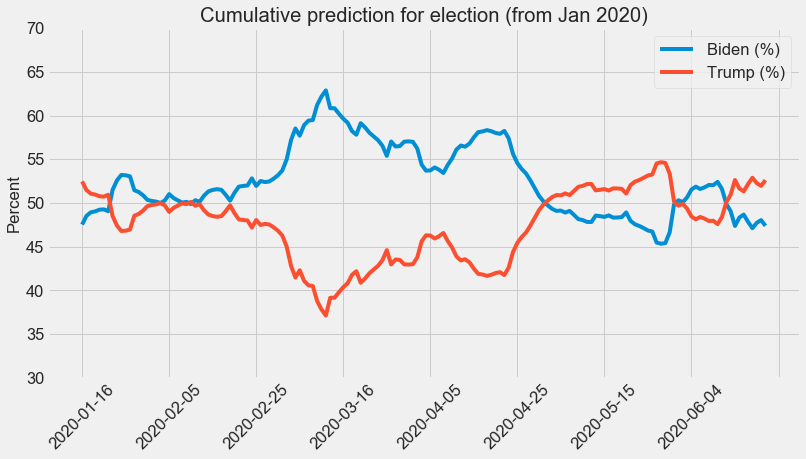

In [5]:
data = pd.read_csv("data/csv/results-14days-from-2020-01-15-to-2020-06-21.csv").set_index("dt")
plt.figure(figsize=(12, 6))

data["Biden (%)"] = data["JB"] / (data["JB"] + data["DT"]) * 100
data["Trump (%)"] = data["DT"] / (data["JB"] + data["DT"]) * 100

data["Biden (%)"].plot()
data["Trump (%)"].plot()
plt.xlabel("")
plt.ylim(30, 70)
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.legend()
plt.title(f"Instantaneous prediction for election (14-day window)")
plt.savefig("fig/results-14days-from-2020-01-15-to-2020-04-18.png", 
            dpi=300, bbox_inches ='tight')
plt.show()

In [9]:
data = pd.read_csv("data/csv/results-14days-from-2020-01-15-to-2020-06-21.csv").set_index("dt")
data["Joe Biden"] = data["JB"] / (data["JB"] + data["DT"]) * 100
data["Donald Trump"] = data["DT"] / (data["JB"] + data["DT"]) * 100
data = data[["Donald Trump", "Joe Biden"]]
data = data.round(1)
print(data)
data.to_csv("data/csv/nation-trump-biden-14days-July.csv")

data = pd.read_csv("data/csv/results-culFrom0115-from-2020-01-16-to-2020-06-21.csv").set_index("dt")
data["Joe Biden"] = data["JB"] / (data["JB"] + data["DT"]) * 100
data["Donald Trump"] = data["DT"] / (data["JB"] + data["DT"]) * 100
data = data[["Donald Trump", "Joe Biden"]]
data = data.round(1)
print(data)
data.to_csv("data/csv/nation-trump-biden-cum-July.csv")

            Donald Trump  Joe Biden
dt                                 
2020-01-16          52.5       47.5
2020-01-17          51.5       48.5
2020-01-18          51.1       48.9
2020-01-19          51.0       49.0
2020-01-20          50.8       49.2
...                  ...        ...
2020-06-17          52.2       47.8
2020-06-18          52.9       47.1
2020-06-19          52.3       47.7
2020-06-20          52.0       48.0
2020-06-21          52.6       47.4

[158 rows x 2 columns]
            Donald Trump  Joe Biden
dt                                 
2020-01-16          43.5       56.5
2020-01-17          44.0       56.0
2020-01-18          45.1       54.9
2020-01-19          45.7       54.3
2020-01-20          45.9       54.1
...                  ...        ...
2020-06-17          46.4       53.6
2020-06-18          46.5       53.5
2020-06-19          46.4       53.6
2020-06-20          46.5       53.5
2020-06-21          46.7       53.3

[158 rows x 2 columns]


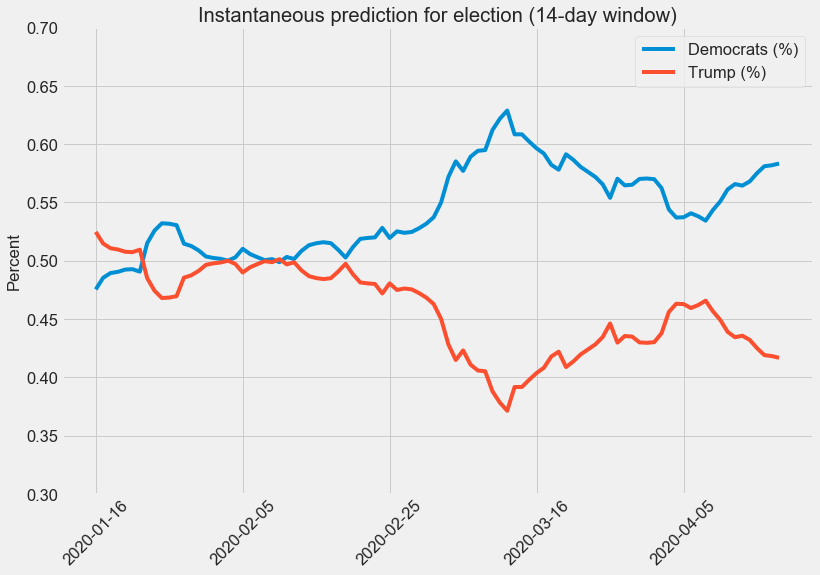

In [34]:
data = pd.read_csv("data/csv/results-culFrom0115-from-2020-01-16-to-2020-06-21.csv", index="dt")
plt.figure(figsize=(12, 6))

data["Biden (%)"] = data["JB"] / (data["JB"] + data["DT"]) * 100
data["Trump (%)"] = data["DT"] / (data["JB"] + data["DT"]) * 100

data["Biden (%)"].plot()
data["Trump (%)"].plot()
plt.xlabel("")
plt.ylim(0.3, 0.7)
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.legend()
plt.title(f"Cumulative prediction for election (from Jan 2020)")
plt.savefig("fig/results-14days.png", dpi=300, bbox_inches ='tight')
plt.show()

In [ ]:
data = pd.read_csv("data/csv/results-14days-from-2020-01-15-to-2020-04-18.csv").set_index("dt")
plt.figure(figsize=(12, 8))

data.plot()
plt.xlabel("")

plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.legend()
plt.title(f"Cumulative prediction for election")
plt.savefig("fig/results-14days-from-2020-01-15-to-2020-04-18.png", 
            dpi=300, bbox_inches ='tight')
plt.show()

In [ ]:
data = pd.read_csv("data/csv/results-culFrom01-from-2020-01-02-to-2020-04-18.csv").set_index("dt")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.2, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for election")
plt.savefig("fig/results-culFrom01-from-2020-01-02-to-2020-04-18.pdf", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

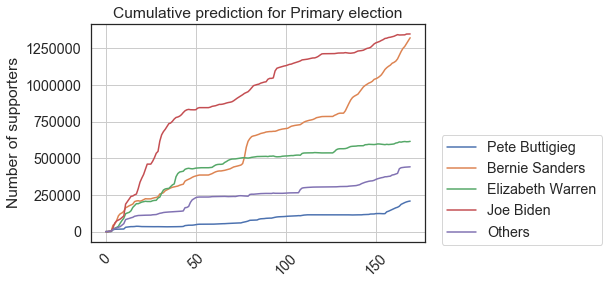

In [22]:
data = pd.read_csv("data/csv/results-culFrom09.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom09.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

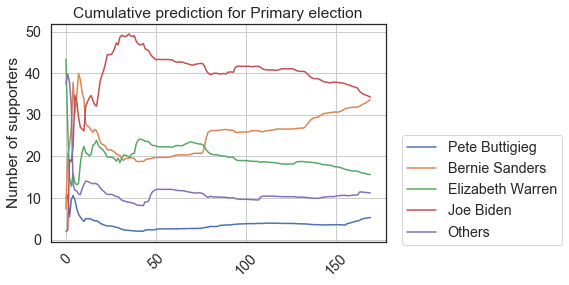

In [23]:
data = pd.read_csv("data/csv/results-culFrom09-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom09-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

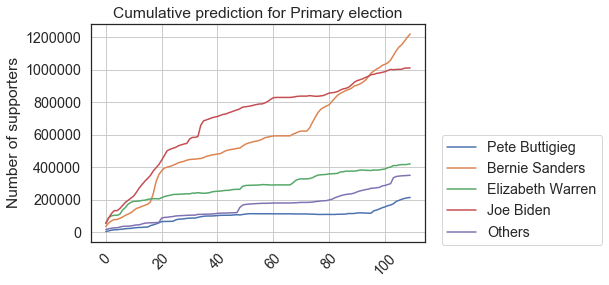

<Figure size 864x576 with 0 Axes>

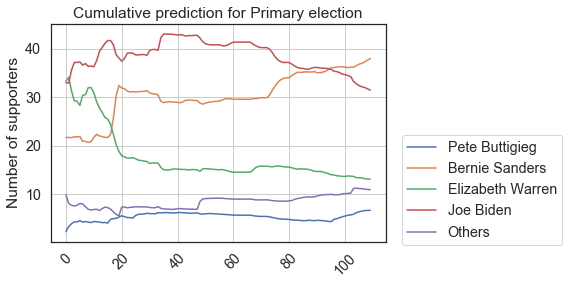

In [24]:
data = pd.read_csv("data/csv/results-culFrom11.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom11.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

data = pd.read_csv("data/csv/results-culFrom11-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom11-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

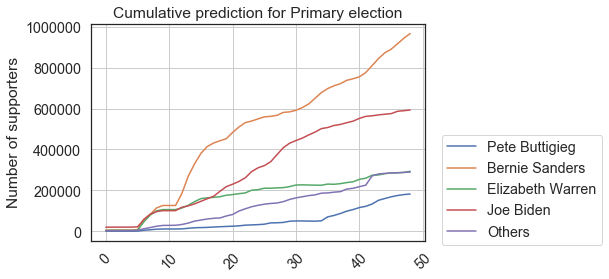

<Figure size 864x576 with 0 Axes>

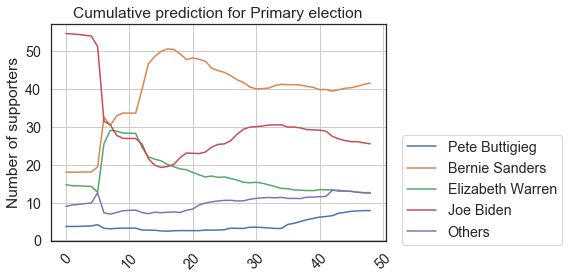

In [25]:
data = pd.read_csv("data/csv/results-culFrom01.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom01.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

data = pd.read_csv("data/csv/results-culFrom01-percent.csv")
plt.figure(figsize=(12, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.savefig("fig/results-culFrom01-percent.csv.png", dpi=300, bbox_inches ='tight')
plt.show()

<Figure size 864x576 with 0 Axes>

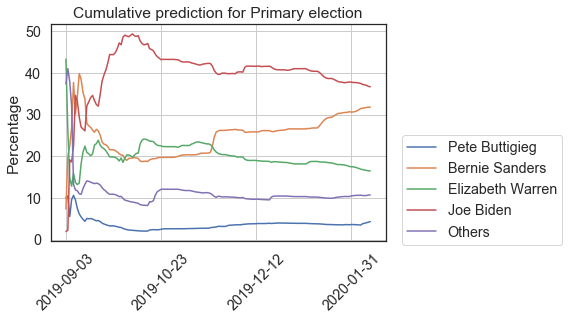

In [6]:
plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

<Figure size 864x576 with 0 Axes>

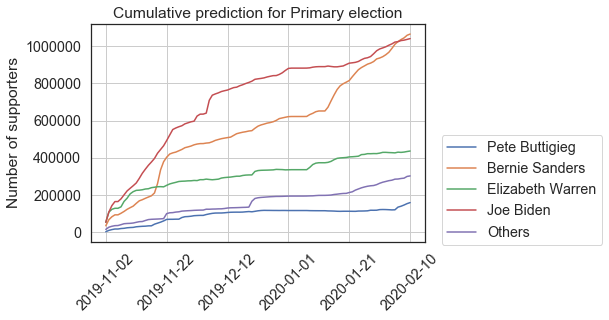

<Figure size 864x576 with 0 Axes>

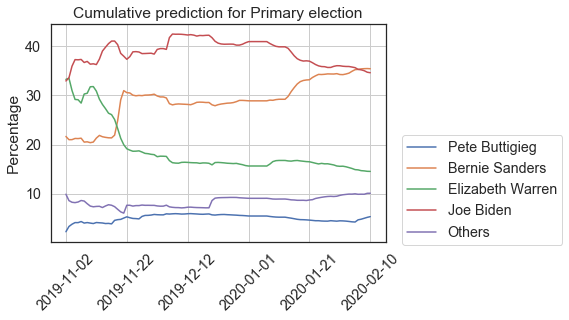

In [8]:
# start from 11

data = pd.read_csv("disk/results-culFrom11.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
                            "1": "Bernie Sanders", 
                            "2": "Elizabeth Warren", 
                            "3": "Joe Biden", 
                            "4": "Others",})

plt.figure(figsize=(12, 8))

data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

data1 = data.div(data.sum(axis=1), axis=0) * 100
# data1

plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

<Figure size 864x576 with 0 Axes>

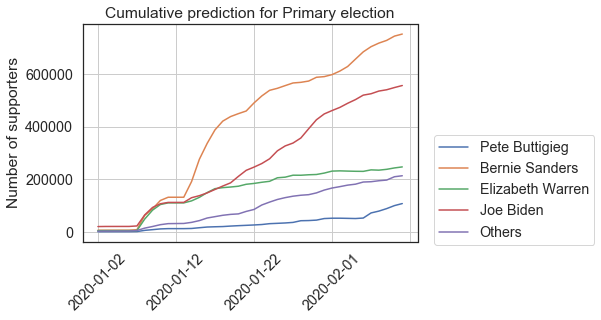

<Figure size 864x576 with 0 Axes>

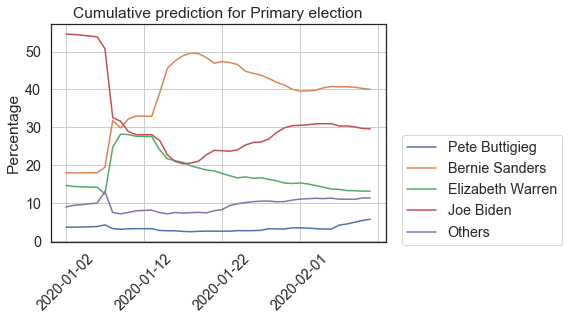

In [9]:
# start from 11

data = pd.read_csv("disk/results-culFrom01.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
                            "1": "Bernie Sanders", 
                            "2": "Elizabeth Warren", 
                            "3": "Joe Biden", 
                            "4": "Others",})

plt.figure(figsize=(12, 8))

data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

data1 = data.div(data.sum(axis=1), axis=0) * 100
# data1

plt.figure(figsize=(12, 8))

data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Cumulative prediction for Primary election")
plt.show()

In [41]:
data = pd.read_csv("disk/results-14days.csv").set_index("dt")
data = data.rename(columns={"0": "Pete Buttigieg", 
"1": "Bernie Sanders", 
"2": "Elizabeth Warren", 
"3": "Joe Biden", 
"4": "Others",})
data

,Pete Buttigieg,Bernie Sanders,Elizabeth Warren,Joe Biden,Others
dt,,,,,
2019-09-17,34208,182280,142307,240117,94305
2019-09-18,34153,187756,165139,243240,97648
2019-09-19,34860,204907,178022,251008,104739
2019-09-20,36482,208871,190547,256282,106606
2019-09-21,36165,210296,190231,292608,109327
...,...,...,...,...,...
2020-02-06,68792,472843,136388,452978,166932
2020-02-07,77382,465275,130930,459734,159130
2020-02-08,87602,453536,131178,455708,154187


<Figure size 2304x576 with 0 Axes>

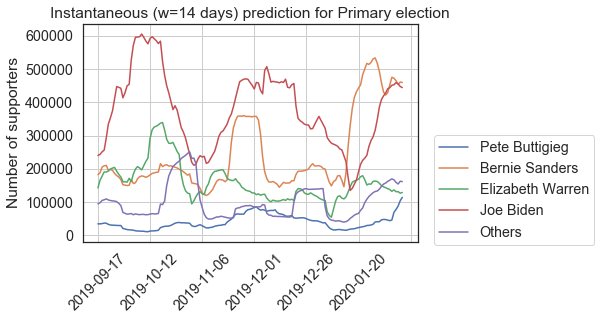

In [42]:
plt.figure(figsize=(32, 8))
data.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Number of supporters")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (w=14 days) prediction for Primary election")
plt.show()

<Figure size 2304x576 with 0 Axes>

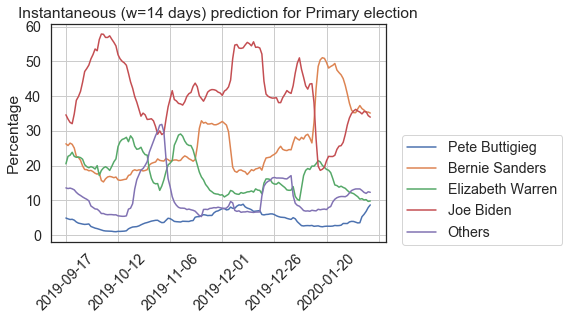

In [43]:
data1 = data.div(data.sum(axis=1), axis=0) * 100
plt.figure(figsize=(32, 8))
data1.plot()
plt.xlabel("")
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(loc=4, bbox_to_anchor=(1.3, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (w=14 days) prediction for Primary election")
plt.show()

(                              name                       loc state  \
 uid                                                                  
 742453163098296320    EmmaVigeland              new york, ny    NY   
 2292116678           affluencekana              new york, ny    NY   
 806537608159514624     BethPapaleo         nolita, manhattan    NY   
 2205848251             DMAMA232323                 new york     NY   
 38378898                 sabrina68             new york, usa    NY   
 ...                            ...                       ...   ...   
 15858526                    DeeNYC               harlem, nyc    NY   
 914331867544997888       Mellighny                  new york    NY   
 390141640           EfficientChris      saratoga springs, ny    NY   
 15374228                   dbxny81                 bronx, ny    NY   
 878803992637321216  drtandthewomen  new york city, new york     NY   
 
                                   county  
 uid                           

In [24]:
# data.to_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")
data = pd.read_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.66.xlsx").set_index("Unnamed: 0")
data.index = pd.to_datetime(data.index)
data = data[1:]

In [18]:
d = data[data.index == "2019-08-11"]

In [78]:
data["Undecided"] = data["Undecided - FF"] + data["Undecided - MP"] + data["Undecided - Undecided"]
data["FF"] = data["Ultra loyal FF"] + data["loyal FF - FF"] + data["loyal FF - MP"] + data["loyal FF - Undecided"]
data["MP"] = data["Ultra loyal MP"] + data["loyal MP - FF"] + data["loyal MP - MP"] + data["loyal MP - Undecided"]

In [135]:
# data.to_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")
data = pd.read_excel("data/Instantaneous (k=10) and cumulative prediction_p=0.6_norm.xlsx")

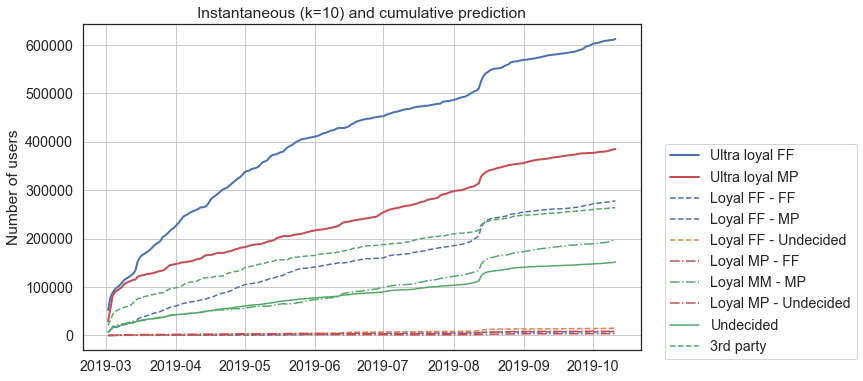

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(data["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c="b")
plt.plot(data["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c="r")

plt.plot(data["loyal FF - FF"], "--", label="Loyal FF - FF", c="b")
plt.plot(data["loyal FF - MP"], "--", label="Loyal FF - MP")
plt.plot(data["loyal FF - Undecided"], "--", label="Loyal FF - Undecided")

plt.plot(data["loyal MP - FF"], "-.", label="Loyal MP - FF", c="r")
plt.plot(data["loyal MP - MP"], "-.", label="Loyal MM - MP")
plt.plot(data["loyal MP - Undecided"], "-.", label="Loyal MP - Undecided")

plt.plot(data["Undecided"], label="Undecided", c="g")
plt.plot(data["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.xlabel("")
plt.grid()
plt.ylabel("Number of users")
plt.legend()
plt.legend(loc=4, bbox_to_anchor=(1.15, -0.05, 0.25, 0.25))
plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.show()

# chart 1

In [35]:
data.columns

Index(['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified', 'Undecided - FF',
       'Undecided - MP', 'Undecided - Undecided', 'loyal FF - FF',
       'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
       'loyal MP - MP', 'loyal MP - Undecided', 'FF', 'MP', 'Undecided'],
      dtype='object')

In [37]:
data0 = data[['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified',
       'loyal FF - FF', 'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
       'loyal MP - MP', 'loyal MP - Undecided', 'Undecided']]
data0 = data0.div(data0.sum(axis=1), axis=0) * 100

In [142]:
# data["Undecided"] = data["Undecided - FF"] + data["Undecided - MP"] + data["Undecided - Undecided"]
# data["FF"] = data["Ultra loyal FF"] + data["loyal FF - FF"] + data["loyal FF - MP"] + data["loyal FF - Undecided"]
# data["MP"] = data["Ultra loyal MP"] + data["loyal MP - FF"] + data["loyal MP - MP"] + data["loyal MP - Undecided"]

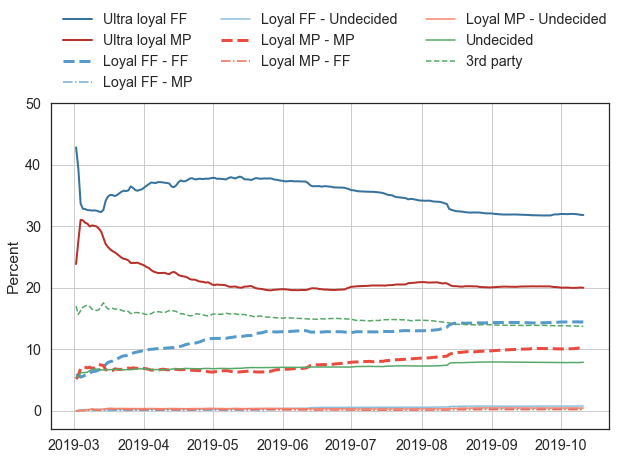

In [39]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data0["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data0["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data0["loyal FF - FF"], "--", label="Loyal FF - FF", c=FF_c[4], lw=3)
plt.plot(data0["loyal FF - MP"], "-.", label="Loyal FF - MP", c=FF_c[5])
plt.plot(data0["loyal FF - Undecided"], label="Loyal FF - Undecided", c=FF_c[6])

plt.plot(data0["loyal MP - MP"], "--", label="Loyal MP - MP", c=MP_c[4], lw=3)
plt.plot(data0["loyal MP - FF"], "-.", label="Loyal MP - FF", c=MP_c[5])
plt.plot(data0["loyal MP - Undecided"], label="Loyal MP - Undecided", c=MP_c[6])

plt.plot(data0["Undecided"], label="Undecided", c="g")
plt.plot(data0["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.ylim(-3, 50)
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(1.02, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [43]:
data0 = data[['Ultra loyal FF', 'Ultra loyal MP', 'Unclassified',
              'loyal FF - FF', 'loyal FF - MP', 'loyal FF - Undecided', 'loyal MP - FF',
              'loyal MP - MP', 'loyal MP - Undecided', 'Undecided']]
data0 = data0.div(data0.sum(axis=1), axis=0) * 100

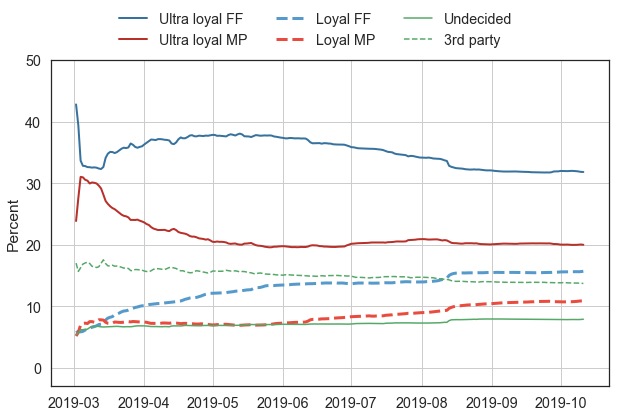

In [44]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data0["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data0["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data0["loyal FF - FF"] + data0["loyal FF - MP"] + data0["loyal FF - Undecided"], "--", label="Loyal FF", c=FF_c[4], lw=3)
plt.plot(data0["loyal MP - FF"] + data0["loyal MP - MP"] + data0["loyal MP - Undecided"], "--", label="Loyal MP", c=MP_c[4], lw=3)

plt.plot(data0["Undecided"], label="Undecided", c="g")
plt.plot(data0["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.ylim(-3, 50)
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(0.85, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)
Others_c = sns.color_palette("Greens_d", 7)

plt.plot(data["Ultra loyal FF"], label="Ultra loyal FF", lw=2, c=FF_c[2])
plt.plot(data["Ultra loyal MP"], label="Ultra loyal MP", lw=2, c=MP_c[2])

plt.plot(data["loyal FF - FF"], "--", label="Loyal FF - FF", c=FF_c[4], lw=3)
plt.plot(data["loyal FF - MP"], "-.", label="Loyal FF - MP", c=FF_c[5])
plt.plot(data["loyal FF - Undecided"], label="Loyal FF - Undecided", c=FF_c[6])

plt.plot(data["loyal MP - MP"], "--", label="Loyal MP - MP", c=MP_c[4], lw=3)
plt.plot(data["loyal MP - FF"], "-.", label="Loyal MP - FF", c=MP_c[5])
plt.plot(data["loyal MP - Undecided"], label="Loyal MP - Undecided", c=MP_c[6])

plt.plot(data["Undecided"], label="Undecided", c="g")
plt.plot(data["Unclassified"], '--', label="3rd party", c="g")

# plt.plot(data["loyal MP - MP"], "-.")
# plt.plot(data["loyal MP - Undecided"], "-.")

plt.grid()
plt.xlabel("")
plt.ylabel("Percent")
plt.legend(loc=4, bbox_to_anchor=(1.02, 1), ncol=3, frameon=False)
# plt.title(f"Instantaneous (k=10) and cumulative prediction")
plt.savefig("fig/chart1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

# chart 23

Static -New Chart-Classified Tweets per User.

In [45]:
data = json.load(open("disk/cul_from_March_1_v2/2019-10-11-0.66.txt"))

In [46]:
distribution_of_n_of_tweets = [0] * 10

for u, v in tqdm(data.items()):
    if v["I"] > 0:
        continue
    _sum = v["K"] + v["M"]
    if _sum <= 5:
        distribution_of_n_of_tweets[_sum - 1] += 1
    elif _sum <= 10:
        distribution_of_n_of_tweets[-5] += 1
    elif _sum <= 20:
        distribution_of_n_of_tweets[-4] += 1
    elif _sum <= 100:
        distribution_of_n_of_tweets[-3] += 1
    elif _sum <= 1000:
        distribution_of_n_of_tweets[-2] += 1
    else:
        distribution_of_n_of_tweets[-1] += 1

In [47]:
distribution_of_n_of_tweets

[742910, 258455, 138894, 88363, 61769, 153413, 99630, 98279, 18623, 263840]

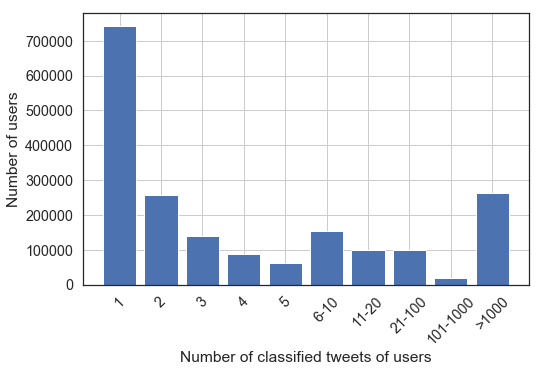

In [49]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)), ["1", "2", "3", "4", "5", "6-10", "11-20", "21-100", "101-1000", ">1000"], rotation=45)
plt.ylabel("Number of users")
plt.grid()
plt.xlabel("Number of classified tweets of users")
plt.savefig("fig/chart23.pdf", dpi=300, bbox_inches="tight")
plt.show()

# chart 24

Static -New Chart-Classified Tweets per User for Userswith Demographic Information Identified.

In [50]:
users = pd.read_pickle("disk/user_profile/02-07-union-users.pl")

In [51]:
userid_with_demo = {str(u) for u in users.index}

In [52]:
opinion_tweets = json.load(open("disk/cul_from_March_1_v2/2019-10-11-0.66.txt"))
users_opinion = []
for uid, v in tqdm(opinion_tweets.items()):
    if v["I"] > 0:
        continue
    if v["M"] > v["K"]:
        users_opinion.append({"uid": int(uid), "opinion": "MP"})
    elif v["M"] < v["K"]:
        users_opinion.append({"uid": int(uid), "opinion": "FF"})
    else:
        users_opinion.append({"uid": int(uid), "opinion": "Others"})
users_opinion = pd.DataFrame(users_opinion).set_index("uid")

In [53]:
users_v2 = users.join(users_opinion, how="inner")

In [54]:
distribution_of_n_of_tweets = [0] * 10

for u, v in tqdm(opinion_tweets.items()):
    if u not in userid_with_demo:
        continue
    if v["I"] > 0:
        continue
    _sum = v["K"] + v["M"]
    if _sum <= 5:
        distribution_of_n_of_tweets[_sum - 1] += 1
    elif _sum <= 10:
        distribution_of_n_of_tweets[-5] += 1
    elif _sum <= 20:
        distribution_of_n_of_tweets[-4] += 1
    elif _sum <= 100:
        distribution_of_n_of_tweets[-3] += 1
    elif _sum <= 1000:
        distribution_of_n_of_tweets[-2] += 1
    else:
        distribution_of_n_of_tweets[-1] += 1

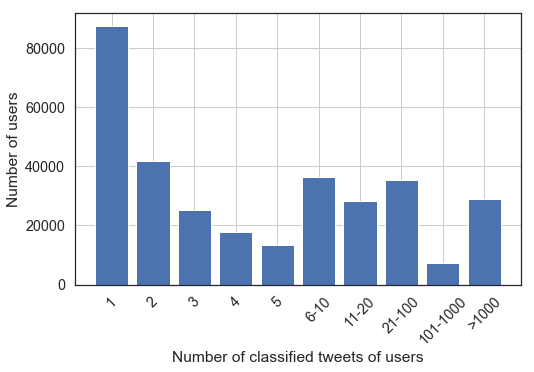

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)), ["1", "2", "3", "4", "5", "6-10", "11-20", "21-100", "101-1000", ">1000"], rotation=45)
plt.ylabel("Number of users")
plt.xlabel("Number of classified tweets of users")
plt.grid()
plt.savefig("fig/chart24.pdf", dpi=300, bbox_inches="tight")
plt.show()

# chart 25
25.Static-NewChart -Percent of Loyal Users’ Tweets that are Pro-Macri or Pro-Christina.

Get loyal FF and loyal MP on Oct 10.

In [56]:
rsts = {}
all_dates = [dt.to_date_string() for dt in pendulum.Period(pendulum.Date(2019, 3, 2), pendulum.Date(2019, 10, 11))]

for dt in all_dates:
    rsts[dt] = {
#         "Ultra loyal FF": 0,
#         "Ultra loyal MP": 0,
        "loyal FF - FF": [],
        "loyal FF - MP": [],
        "loyal FF - Undecided": [],
        "loyal MP - FF": [],
        "loyal MP - MP": [],
        "loyal MP - Undecided": [],
#         "Undecided - FF": 0,
#         "Undecided - MP": 0,
#         "Undecided - Undecided": 0,
#         "Others": 0,
    }
# print(rsts)

for line in tqdm(open("data/users-20190301-20191010-opinion-10-0.66.json")):
    d = json.loads(line.strip())
    uid = d["uid"]
    opinion = d["opinion"]
    i = 0
    op = opinion[0]["long - short"]
    dt_op = opinion[0]["dt"]

    opinion = d["opinion"]
    i = 0
    next_dt = opinion[i]["dt"]

    for dt in all_dates:
        if dt == next_dt: # opinion may change
            if i + 1 <= len(opinion) - 1:
                next_dt = opinion[i+1]["dt"]
            op = opinion[i]["long - short"]
            if op == "end":
                break
            i += 1

        if i > 0: # from the first opinion
            if dt == "2019-10-10":
                try:
                    rsts[dt][op].append(uid)
                except KeyError:
                    pass

json.dump(rsts["2019-10-10"], open("data/users-20191010-opinion-10-ts-userid.json", "w"))

In [58]:
# rst = json.load(open("data/users-20191010-opinion-10-ts-0.66-userid.json"))
rst = rsts["2019-10-10"]

In [59]:
uid_loyalFF = []
uid_loyalFF.extend(rst["loyal FF - FF"])
uid_loyalFF.extend(rst["loyal FF - MP"])
uid_loyalFF.extend(rst["loyal FF - Undecided"])
uid_loyalFF = set(uid_loyalFF)
len(uid_loyalFF)

260701

In [60]:
uid_loyalMP = []
uid_loyalMP.extend(rst["loyal MP - FF"])
uid_loyalMP.extend(rst["loyal MP - MP"])
uid_loyalMP.extend(rst["loyal MP - Undecided"])
uid_loyalMP = set(uid_loyalMP)
len(uid_loyalMP)

189817

In [61]:
distribution_of_n_of_tweets = [0] * 10
dist = []
n = 0
for u, v in tqdm(opinion_tweets.items()):
    if u not in uid_loyalFF or (v["K"] + v["M"]) <= 0:
        continue
    if v["I"] > 0:
        continue
    prop = v["K"] / (v["K"] + v["M"])
    dist.append(prop)
    index = int(prop * 10)
    try:
        distribution_of_n_of_tweets[index] += 1
    except:
#         print(prop, index, v["K"] + v["M"])
        n += 1
n

0

In [62]:
pd.Series(dist).describe()

count    260701.000000
mean          0.704890
std           0.092676
min           0.501639
25%           0.655172
50%           0.666667
75%           0.764706
max           0.995146
dtype: float64

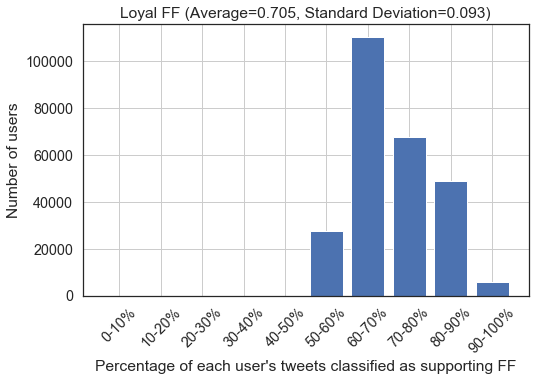

In [64]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)),
           ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"], rotation=45)
plt.grid()
plt.title("Loyal FF (Average=0.705, Standard Deviation=0.093)")
plt.ylabel("Number of users")
plt.xlabel("Percentage of each user's tweets classified as supporting FF")
plt.savefig("fig/chart25-1.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [65]:
distribution_of_n_of_tweets = [0] * 10
dist = []
n = 0
for u, v in tqdm(opinion_tweets.items()):
    if u not in uid_loyalMP or (v["K"] + v["M"]) <= 0:
        continue
    if v["I"] > 0:
        continue
    prop = v["M"] / (v["K"] + v["M"])
    dist.append(prop)
    index = int(prop * 10)
    try:
        distribution_of_n_of_tweets[index] += 1
    except:
#         print(prop, index, v["K"] + v["M"])
        n += 1
n

0

In [66]:
pd.Series(dist).describe()

count    189817.000000
mean          0.696054
std           0.093259
min           0.501684
25%           0.625000
50%           0.666667
75%           0.750000
max           0.990566
dtype: float64

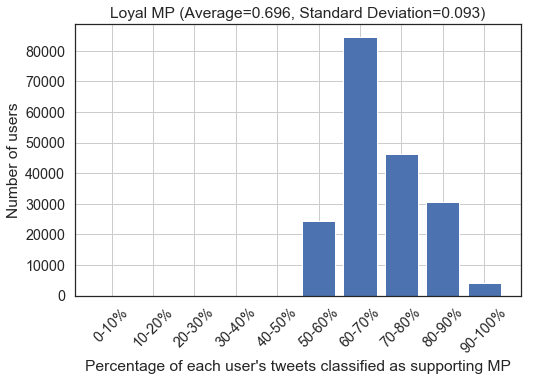

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(distribution_of_n_of_tweets)), distribution_of_n_of_tweets)
plt.xticks(range(len(distribution_of_n_of_tweets)),
           ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"], rotation=45)
plt.grid()
plt.title("Loyal MP (Average=0.696, Standard Deviation=0.093)")
plt.ylabel("Number of users")
plt.xlabel("Percentage of each user's tweets classified as supporting MP")
plt.savefig("fig/chart25-2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

In [68]:
distribution_of_n_of_tweets

[0, 0, 0, 0, 0, 24352, 84526, 46184, 30567, 4188]

# FIG 1 & 2

hashtag and topic distribution

# FIG 3

In [69]:
from SQLite_handler2 import predict_dir_to_csv

In [ ]:
start = pendulum.datetime(2019, 3, 14, tz="UTC") # include this date
end = pendulum.datetime(2019, 10, 11, tz="UTC") # include this date
predict_dir_to_csv(start, end, in_dir="users-14days_v2", prob=0.66)

In [74]:
# data = pd.read_csv(f"data/cul_start_3_0.64.csv").set_index("dt")
data = pd.read_csv(f"data/users-14days_v2_0.66.csv").set_index("dt")

data.index = pd.to_datetime(data.index)
data = data.div(data.sum(axis=1), axis=0)
data = data.round(3) * 100

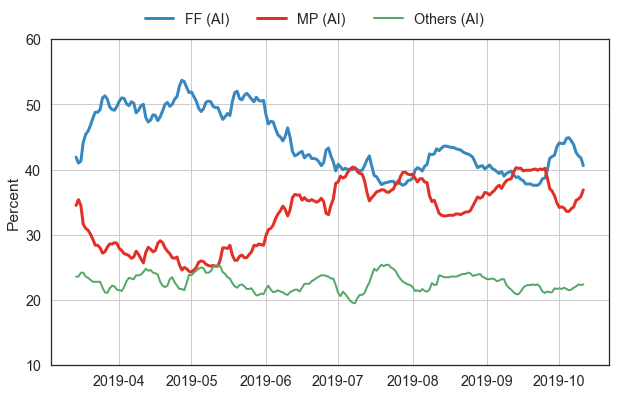

In [75]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["FF"], lw=3, label=f"FF (AI)", color=FF_c[3])
plt.plot(data["MP"], lw=3, label=f"MP (AI)", color=MP_c[3])
plt.plot(data["Others"], lw=2, label=f"Others (AI)", color="g")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Percent")
plt.ylim(10, 60)
plt.xlabel("")
plt.savefig("fig/fig3.pdf", dpi=300, bbox_inches ='tight')
plt.show()

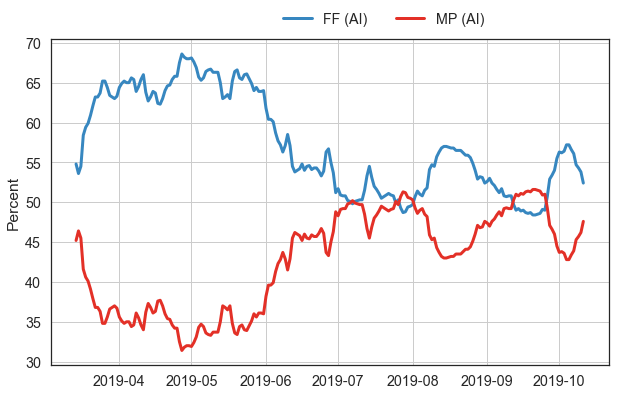

In [77]:
# data = pd.read_csv(f"data/cul_start_3_0.64.csv").set_index("dt")
data = pd.read_csv(f"data/users-14days_v2_0.66.csv").set_index("dt")

data.index = pd.to_datetime(data.index)
data = data[["FF", "MP"]]
data = data.div(data.sum(axis=1), axis=0)
data = data.round(3) * 100

sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["FF"], lw=3, label=f"FF (AI)", color=FF_c[3])
plt.plot(data["MP"], lw=3, label=f"MP (AI)", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Percent")
plt.ylim(25, 60)
plt.xlabel("")
plt.savefig("fig/fig3-2.pdf", dpi=300, bbox_inches ='tight')
plt.show()

# FIG 4 & 5

in the end of PASO.ipynb

# chart 29-32

In [78]:
data = [json.loads(line.strip()) for line in open("data/stat_v2.json")]

In [79]:
data = pd.DataFrame(data).set_index("dt")

In [80]:
data.tail(1)

,K_tweet_count,K_user_count,M_tweet_count,M_user_count,classified_tweet_count,classified_user_count,tweet_count,user_count
dt,,,,,,,,
2019-10-11,76439,26790,106991,31170,183430,57960,243885,75084


In [86]:
data.sum()

K_tweet_count             20864943
K_user_count               7079926
M_tweet_count             23758353
M_user_count               6530038
classified_tweet_count    44623296
classified_user_count     13609964
tweet_count               58438218
user_count                17600918
dtype: int64

In [81]:
data.index = pd.to_datetime(data.index)

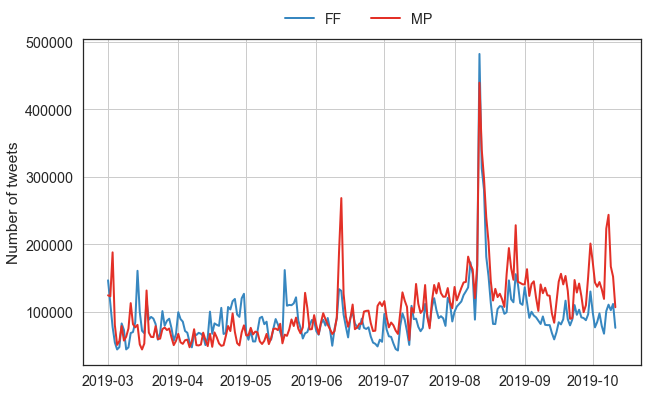

In [82]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["K_tweet_count"], lw=2, label=f"FF", color=FF_c[3])
plt.plot(data["M_tweet_count"], lw=2, label=f"MP", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.65, 1), ncol=3, frameon=False)
plt.ylabel("Number of tweets")
plt.xlabel("")
plt.savefig("fig/chart29.pdf", dpi=300, bbox_inches ='tight')
plt.show()

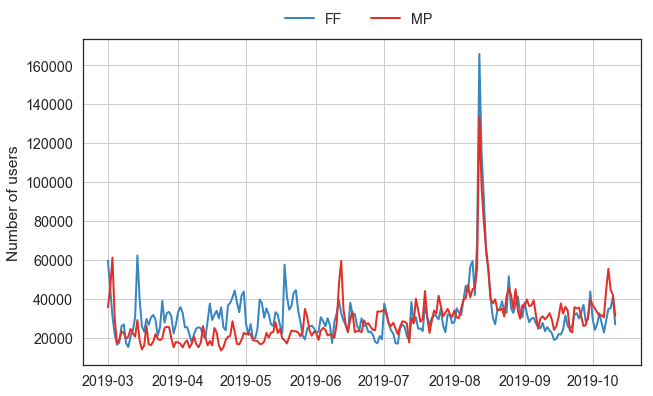

In [83]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["K_user_count"], lw=2, label=f"FF", color=FF_c[3])
plt.plot(data["M_user_count"], lw=2, label=f"MP", color=MP_c[3])

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.65, 1), ncol=3, frameon=False)
plt.ylabel("Number of users")
plt.xlabel("")
plt.savefig("fig/chart30.pdf", dpi=300, bbox_inches ='tight')
plt.show()

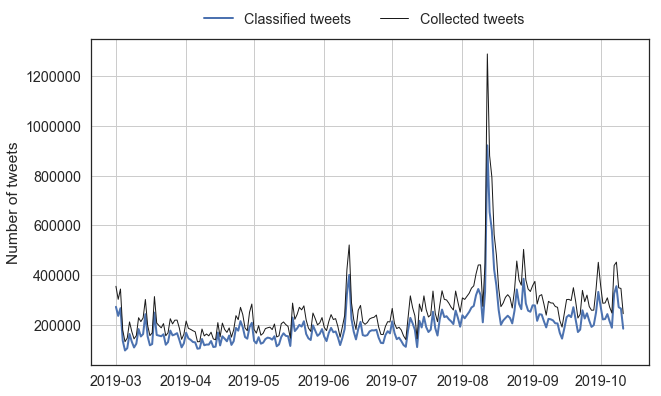

In [84]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["classified_tweet_count"], lw=2, label=f"Classified tweets", color="b")
plt.plot(data["tweet_count"], lw=1, label=f"Collected tweets", color="k")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Number of tweets")
plt.xlabel("")
plt.savefig("fig/chart31.pdf", dpi=300, bbox_inches ='tight')
plt.show()

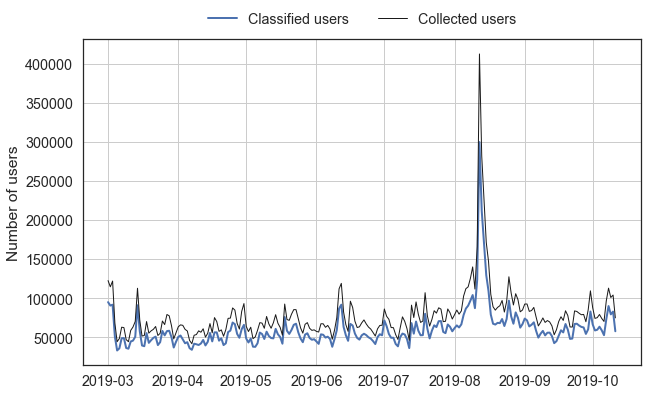

In [85]:
sns.set(style="white", font_scale=1.3)

plt.figure(figsize=(10, 6))
FF_c = sns.color_palette("Blues_d", 7)
MP_c = sns.color_palette("Reds_d", 7)

plt.plot(data["classified_user_count"], lw=2, label=f"Classified users", color="b")
plt.plot(data["user_count"], lw=1, label=f"Collected users", color="k")

plt.grid()
plt.legend(loc=4, bbox_to_anchor=(0.8, 1), ncol=3, frameon=False)
plt.ylabel("Number of users")
plt.xlabel("")
plt.savefig("fig/chart32.pdf", dpi=300, bbox_inches ='tight')
plt.show()